# Домашнее задание к модулю 4. Распознавание изображений

Это домашнее задание посвящено распознаванию изображений. Мы уже смотрели на эту задачу в модулях №3 и №4, теперь пришло время поработать с этой задачей "руками".

Работать мы будем снова с датасетом FashionMnist (https://github.com/zalandoresearch/fashion-mnist ),  
но для того, чтобы приблизить задачу к реальности (как будет у вас в жизни), мы немного модифицировали датасет: 
* Данные теперь хранятся в настоящих png-картинках. 
* Изображения повернуты на случайный угол.
* К изображениям добавлен случайный шум. 

#### Библиотека pillow
Так как изображения теперь хранятся в виде настоящих картинок, нам понадобится библиотека для работы с изображениями.
Убедитесь, что у вас она установлена. Установить библиотеку можно отсюда: https://anaconda.org/anaconda/pillow

In [1]:
%matplotlib inline
from IPython.core.display import display #модуль для отображения чего угодна в jupyter
from PIL import Image #объект для работы с картинками из библиотеки pillow
import numpy as np

Загрузим настоящую картинку из файл и для удобства изменим ее размер до 200x200.
Кстати, на этой картинке, "лена", изображена девушка, которая используется для проверки многих методов работы с изображениями
https://ru.wikipedia.org/wiki/%D0%9B%D0%B5%D0%BD%D0%B0_(%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5)

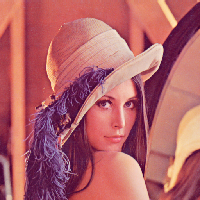

In [2]:
lena = Image.open('lena.png')
lena = lena.resize((200, 200))
display(lena)

Мы будем работа с черно-белыми изображениями, так что двайте сконвертируем Лену в черно-белую гамму:

Подробнее о цветах можно почитать в документации: https://pillow.readthedocs.io/en/3.1.x/reference/Image.html

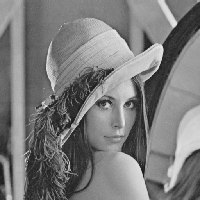

In [3]:
lena = lena.convert('L')
display(lena)

Картинки в модуле pillow очень легко превращать в массивы библиотеки numpy:

In [4]:
lena_array = np.array(lena)
print(lena_array)
print(lena_array.shape)
##получили массив 200x200 с яркостями пикселей

[[162 161 163 ... 163 171 154]
 [162 161 163 ... 163 171 154]
 [160 158 159 ... 127  92  63]
 ...
 [ 47  52  52 ...  60  81  90]
 [ 46  49  50 ...  81 100  97]
 [ 43  51  49 ...  91 100 105]]
(200, 200)


Обратно картинку из массива тоже сделать очень легко:

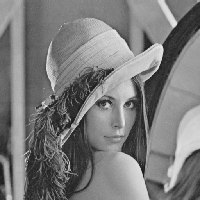

In [5]:
lena_recovered = Image.fromarray(lena_array)
display(lena_recovered)

## Чтение датасета
Данные хранятся в папке hw_train, рассортированные по папкам, соответствующим названиям типов одежды. Внутри каждого типа содержится примерно 20000 изображений, соответствующих этому типу одежды. 

Пример изображения, соответствующего сумочке, хранится в файле **hw_train/Bag/1000.png**

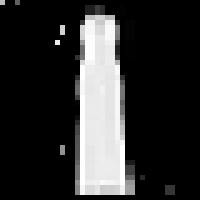

In [6]:
image = Image.open('hw_train/Dress/10003.png')
display(image.resize((200,200)))

2. Считаем все картинки в память. Заодно сразу преобразуем их в numpy-массивы, так как таким образом с ними работать будет удобно работать. Чтение данных займет какое-то время, запаситесь кофе ;)

In [7]:
import os
label_texts = ['Ankle_boot', 'Dress', 'Sneaker', 'Coat', 'Sandal', 'T_shirt_top', 'Bag', 'Shirt', 'Pullover', 'Trouser']
image_width = 40
image_height = 40
data = []
labels = []
for label_num in range(len(label_texts)):
    label_text = label_texts[label_num]
    print('reading images for ' + label_text )
    for image_file in os.listdir('hw_train/' + label_text):
        #некоторые операционные системы любят добавлять всякие дополнительные файлы в папки, пропустим их.
        if not (image_file.endswith('.png')):
            continue 
        image = Image.open('hw_train/' + label_text + '/' + image_file)
        #некоторые операционные системы любят добавлять уменьшенные копии изображений. Пропустим их.
        if (image.width == image_width) and (image_height == 40):
            data.append(np.array(image))
        labels.append(label_num)
data = np.array(data).reshape(len(data), image_width, image_height, 1)
labels = np.array(labels)

reading images for Ankle_boot
reading images for Dress
reading images for Sneaker
reading images for Coat
reading images for Sandal
reading images for T_shirt_top
reading images for Bag
reading images for Shirt
reading images for Pullover
reading images for Trouser


Применим one_hot_encoding преобразование к лейблам. 
Напоминаем, что one_hot_encoding - это когда мы один лейбл с номером класса заменяем вектором, 
в котором в колонке, соответствующей номеру класса, стоит еденица, а в других местах - нули. 

In [8]:
from tensorflow.keras.utils import to_categorical
labels_encoded = to_categorical(labels)

#пример для одной из картинок
#1 на 0-й позиции говорит нам о том что данный объект относится к 0-му классу(Ankle_boot)
print(labels_encoded[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Разделим на train и test:

In [9]:
from sklearn.model_selection import train_test_split
data_train, data_test, labels_train, labels_test = train_test_split(data, labels_encoded)

# Обучим сверточную нейронную сеть.

Для начала создадим модель и добавим в нее 2 слоя свертки и два слоя пулинга. Про то, как работает свертка и пулинг, вы можете **по желанию** прочитать ниже в дополнительных материалах в данном ноутбуке.

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D



model = Sequential()
model.add(Convolution2D(64, kernel_size=5, activation='sigmoid'))
model.add(MaxPooling2D(pool_size=2))
model.add(Convolution2D(64, kernel_size=5, activation='sigmoid'))
model.add(MaxPooling2D(pool_size=2))


Теперь приведем модель к "линейному" виду. Чтобы модель не переобучалась, добавим в нее дропаут слой.
Про дропаут вы также можете  **по желанию** почитать ниже в данном ноутбуке. По сути дропаут - это отключение заданной доли нейронов случайным образом.

In [32]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

model.add(Flatten())
model.add(Dropout(0.5))

# Задание

Добавьте в модель конечный плотный слой. Слой должен содержать количество нейронов, равное количеству классов (10),
и использовать функцию активации **softmax**

In [33]:
from tensorflow.keras.layers import Dense

model.add(Dense(10, activation = 'softmax'))

In [34]:
from tensorflow.keras import optimizers
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
model.fit(data_train, labels_train, 
          batch_size=1000,
          epochs=20,
          validation_data=(data_test, labels_test))

Train on 150000 samples, validate on 50000 samples
Epoch 1/50
150000/150000 [==============================] - 239s 2ms/step - loss: 0.8164 - acc: 0.7008 - val_loss: 0.4752 - val_acc: 0.8335
Epoch 2/50
150000/150000 [==============================] - 246s 2ms/step - loss: 0.4456 - acc: 0.8365 - val_loss: 0.3835 - val_acc: 0.8652
Epoch 3/50
150000/150000 [==============================] - 246s 2ms/step - loss: 0.3787 - acc: 0.8625 - val_loss: 0.3401 - val_acc: 0.8805
Epoch 4/50
150000/150000 [==============================] - 246s 2ms/step - loss: 0.3423 - acc: 0.8764 - val_loss: 0.3117 - val_acc: 0.8885
Epoch 5/50
150000/150000 [==============================] - 242s 2ms/step - loss: 0.3206 - acc: 0.8844 - val_loss: 0.2962 - val_acc: 0.8952
Epoch 6/50
150000/150000 [==============================] - 242s 2ms/step - loss: 0.3068 - acc: 0.8885 - val_loss: 0.2853 - val_acc: 0.8977
Epoch 7/50
150000/150000 [==============================] - 243s 2ms/step - loss: 0.2916 - acc: 0.8944 - val_

KeyboardInterrupt: 

#### Загрузим контрольные данные и выполним предсказание

Как обычно, ваша задача - вставить результат работы модели в систему edx на странице Домашнее задание. 
В нашем случае выборка сбалансирована, каждый класс содержит примерно 10% всех изображений, поэтому критерием оценки будет метрика **accuracy**

Для зачета вам необходимо верно распознать хотя бы 60% изображений. Это можно сделать, просто добавив плотный слой в конец нейросети и обучив модель.

Если вы распознали верно более 60% изображений, **ваш бал будет равен значению метрики accuracy**.

Для получения более высокого балла попробуйте изменить параметры нейросети и ее обучения. 
Можно попробовать: 
* увеличить количество эпох при обучении
* поменять количество параметров в сверточных слоях
* поменять размер ядра в сверточных слоях
* воспользоваться более продвинутыми версиями оптимизатора (https://keras.io/optimizers/). В частности, можете попробовать поменять learning rate.


In [36]:
data_control = []
n_files = 1000
for i in range(n_files):
    filename = "hw_test/{}.png".format(i)
    image = Image.open(filename)
    data_control.append(np.array(image))
data_control = np.array(data_control).reshape(len(data_control), image_width, image_height, 1)
prediction = model.predict_classes(data_control)
prediction_labels = [label_texts[label] for label in prediction]
print(','.join(prediction_labels))

Trouser,Sandal,Bag,Sneaker,Shirt,Trouser,Sneaker,T_shirt_top,Sandal,Ankle_boot,Sandal,Trouser,Trouser,Sandal,Pullover,Pullover,Sneaker,Dress,Bag,Ankle_boot,Trouser,Shirt,Shirt,Pullover,Ankle_boot,Dress,Bag,Ankle_boot,Shirt,Dress,Pullover,Ankle_boot,Coat,Coat,Pullover,Bag,Shirt,T_shirt_top,Ankle_boot,Sandal,Trouser,Ankle_boot,Sandal,Dress,Pullover,Sandal,Bag,Coat,Shirt,Trouser,Trouser,Coat,Coat,Pullover,Coat,Shirt,Dress,Sandal,Pullover,T_shirt_top,Sneaker,Sneaker,Pullover,Sandal,Pullover,Shirt,Shirt,Coat,Ankle_boot,Shirt,Dress,Pullover,T_shirt_top,Trouser,Shirt,Pullover,Ankle_boot,Coat,Sandal,T_shirt_top,Shirt,Coat,Trouser,Sandal,Ankle_boot,T_shirt_top,Dress,Ankle_boot,Coat,Pullover,Sandal,Ankle_boot,Shirt,Shirt,Dress,Bag,Sandal,Pullover,Trouser,Bag,Sneaker,Sandal,Bag,Ankle_boot,T_shirt_top,Dress,Trouser,Pullover,Ankle_boot,Coat,T_shirt_top,T_shirt_top,Ankle_boot,Bag,Sneaker,Pullover,Bag,Pullover,Ankle_boot,Pullover,T_shirt_top,Trouser,Ankle_boot,Dress,Dress,Sneaker,Coat,T_shirt_top,Bag

# Дополнительная информация

#### Свертка

Мы будем распознавать изображения при помощи сверточной нейросети.
Для этого давайте разберемся, что такое операция свертки. 

Операция свертки - это замена пикселя изображения взвешенным средним других пикселей. Веса пикселей задаются при помощи "ядра свертки".

![](https://docs.gimp.org/ru/images/filters/examples/convolution-calculate.png)
(картинка из оффициальной документации GIMP, там можно почтитать про свертку подробнее https://docs.gimp.org/ru/plug-in-convmatrix.html)

По сути, операция свертки позволяет находить,
где на изображении есть кусочки, максимально похожие на ядро свертки.

#### Пулинг 

Свертка выполняет поиск кусочков изображения, похожих на фильтр. Часто после того, как мы применили операцию свертки, для нас достаточно самого факта того, что на изображении нашелся фильтр в определенной позиции. После этого размер изображения можно уменьшить, применив операцию пулинга. 


![](./pooling.png)

#### Дропаут

В нейросетях может содержаться очень больше количество нейронов, и, соответственно, большое количество параметров для оптимизации. Это может легко приводить к переобучению модели. Для того, чтобы этого не происходило, мы можем случайным образом "выключать" часть нейронов. В этом случае модели приходится обучаться более "стабильно", чтобы даже частью нейронов можно было предсказать результат. 

Более подробно про дропаут можно почитать например тут: https://habr.com/company/wunderfund/blog/330814/

#### Сверточная нейронная сеть

Дополнительную информацию по сверточным нейронным сетям можно почитать, например, здесь:
https://habr.com/post/309508/